# Data in Motion Weekly Data Analysis Challenge
## Week 10: U.S. Automobile Accidents 

Link to dataset: https://buff.ly/3wl3bYG 

Challenge Questions:
1.    Is there any missing data? If so, visualize it in a plot.
2.    Remove any columns that you may find not useful for your analysis.
3.    Plot the top 10 cities with the most accidents.
4.    Plot the distribution of the start time.
5.    Is the distribution of accidents by hour the same on weekends as on weekdays?
6.    What is the distribution of start time on Sundays?
7.    Create a geographical plot to show accidents across a map of the United States.
8.    Among the top 100 cities in number of accidents, which states do they belong to most frequently?
9.    Which months have the most accidents?
10.   What is the trend of accidents year over year (decreasing/increasing?)
11.   Is the state of New York in the data?
12.   Come up with your own question and answer it.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import folium as folium
from folium.plugins import HeatMap

In [2]:
# read in data
df = pd.read_csv('Data/W10_US_Accidents_Dec21_updated.csv', parse_dates=['Start_Time', 'End_Time'])

In [3]:
# view head of data
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
# check shape of data
df.shape

(2845342, 47)

In [5]:
# view df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

### 1.    Is there any missing data? If so, visualize it in a plot.

In [6]:
# check total number of nulls in the data set
df.isnull().sum().sum()

3414349

**There are 3,414,349 missing values in total.**

In [7]:
# check nulls by column
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

<AxesSubplot:>

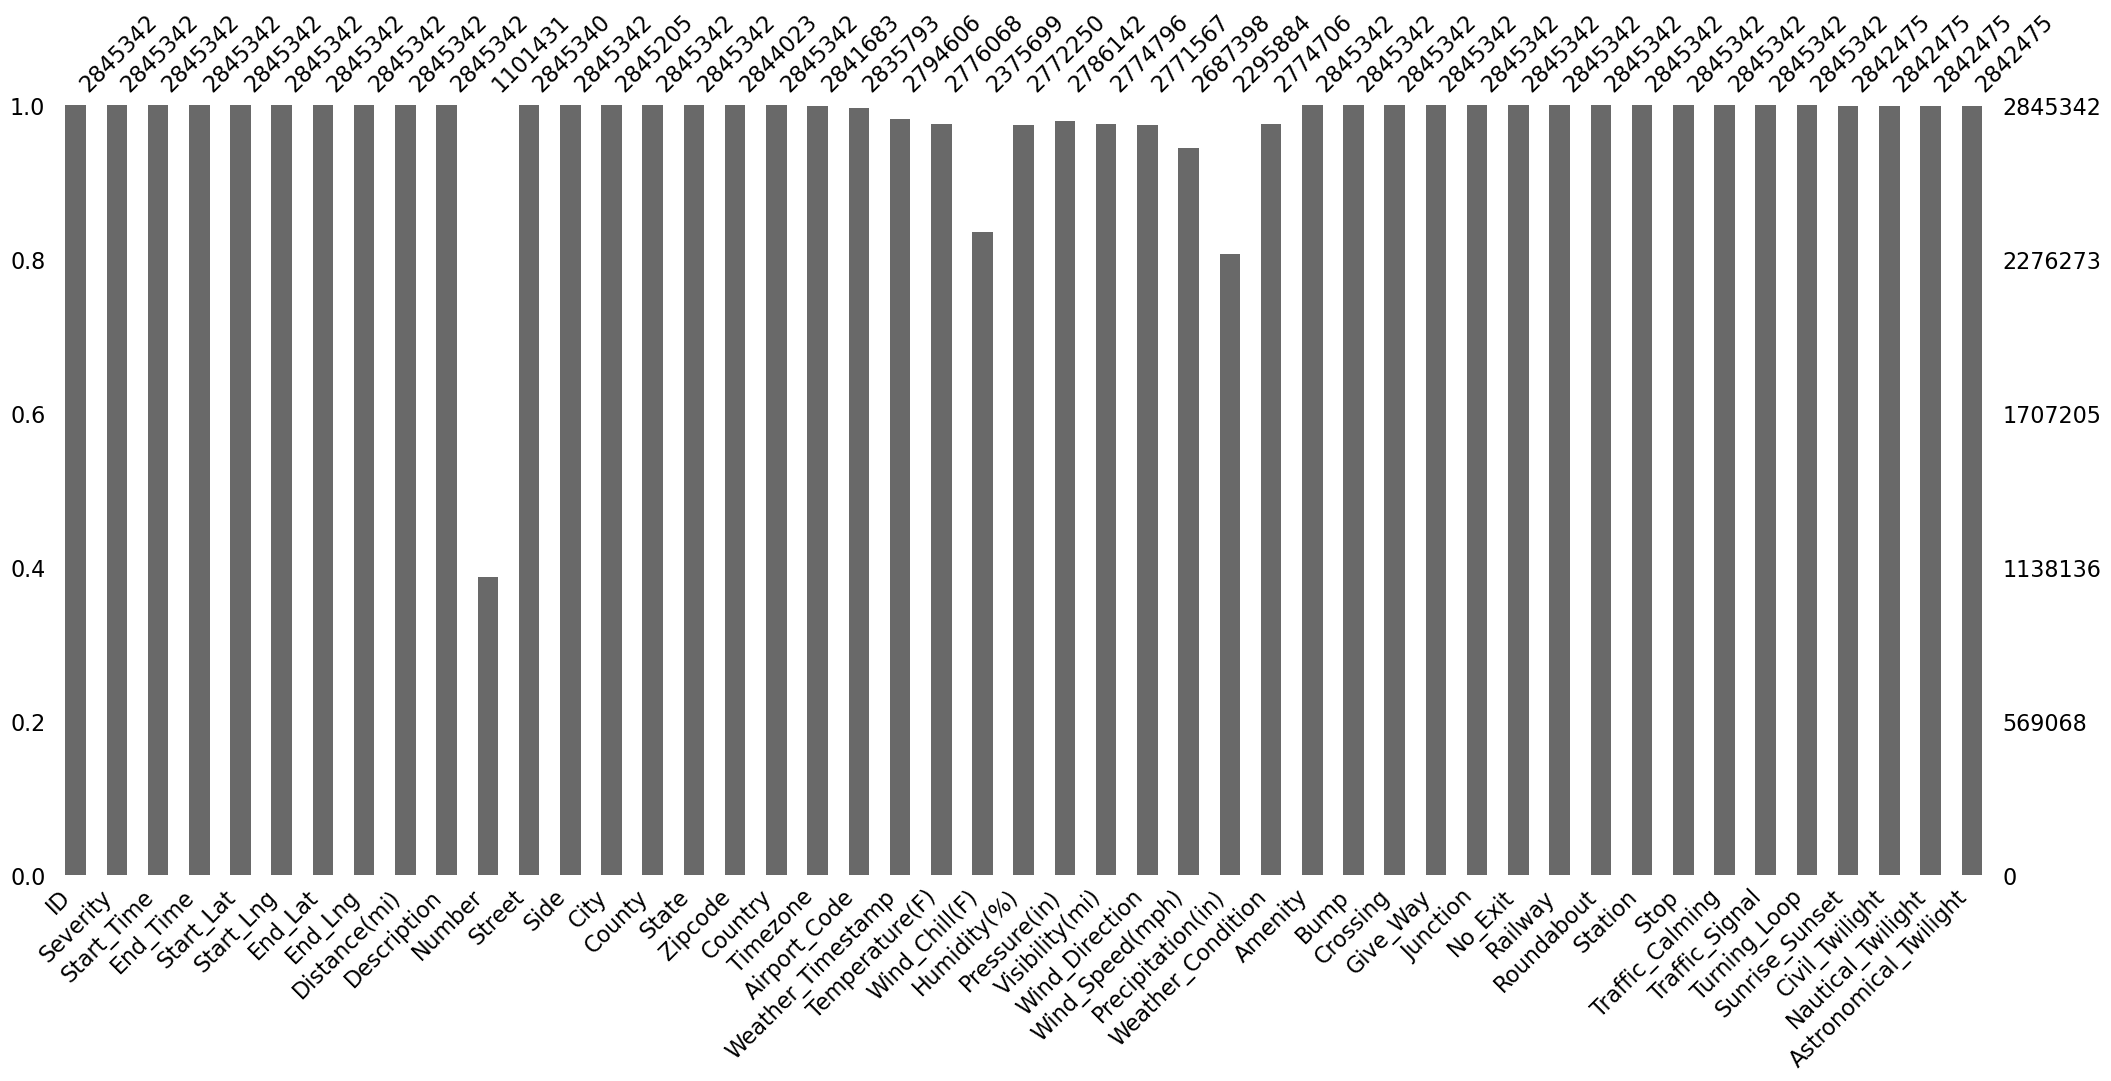

In [8]:
# plot percentage of values present per column
msno.bar(df)

### 2.    Remove any columns that you may find not useful for your analysis.

**Since the questions to be answered by our analysis revolve around time and geographical location, I will drop the columns pertaining to weather, sunrise/sunset, and street types.**

In [9]:
# drop unused columns
df = df.iloc[:,:17]

In [10]:
# view head of data
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217


### 3.    Plot the top 10 cities with the most accidents.

In [11]:
# group dataframe by city and state, count the number of accidents using the ID column
cities = df.groupby(['City', 'State'])['ID']\
        .count()\
        .sort_values(ascending=False)\
        .reset_index()\
        .copy()\
       
cities.head(10)

,City,State,ID
0,Miami,FL,106896
1,Los Angeles,CA,68956
2,Orlando,FL,54654
3,Dallas,TX,41615
4,Houston,TX,39366
5,Charlotte,NC,32998
6,Sacramento,CA,32559
7,San Diego,CA,26627
8,Raleigh,NC,22837
9,Minneapolis,MN,22768


[Text(0.5, 1.0, 'Top 10 Cities for Automobile Accidents')]

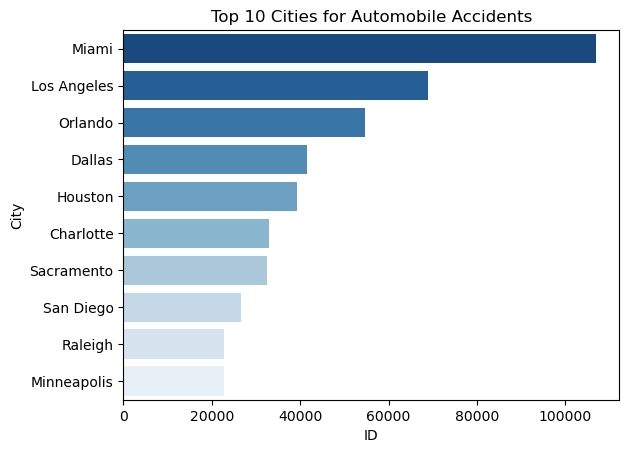

In [12]:
# view barplot of cities dataframe
sns.barplot(cities.head(10), 
            x='ID', 
            y='City', 
            orient='h', 
            palette='Blues_r')\
            .set(title='Top 10 Cities for Automobile Accidents')

### 4.    Plot the distribution of the start time.

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

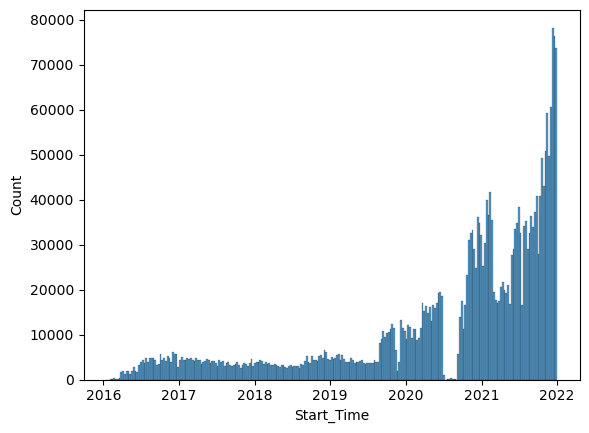

In [13]:
sns.histplot(data=df, x='Start_Time')

### 5.    Is the distribution of accidents by hour the same on weekends as on weekdays?

In [14]:
# add start hour, day of week, and weekend columns
df['Day_of_Week'] = df['Start_Time'].dt.dayofweek
df['Start_Hour'] = df['Start_Time'].dt.hour
df['Weekend'] = np.where(df['Day_of_Week'] >= 5, True, False)

In [15]:
# view sample of the dataframe with added columns
df.sample(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Day_of_Week,Start_Hour,Weekend
718854,A-718855,2,2021-09-07 20:25:00,2021-09-08 00:01:17,33.772155,-117.502564,33.770449,-117.502914,0.120,Accident from Deergrass St to Larkspur Dr.,24821.0,Trilogy Pkwy,L,Corona,Riverside,CA,92883-9403,1,20,False
2036468,A-2036469,2,2020-11-22 01:07:49,2020-11-22 02:26:40,40.084836,-75.389259,40.085021,-75.388787,0.028,Incident on W DEKALB PIKE near S GULPH RD Driv...,779.0,W Dekalb Pike,L,King Of Prussia,Montgomery,PA,19406-3006,6,1,True
782193,A-782194,2,2021-09-20 16:40:00,2021-09-20 18:25:43,43.158041,-77.685688,43.157321,-77.701218,0.784,NYSDOT - Region 4: Crash on I-490 westbound at...,NaN,I-490 W,R,Rochester,Monroe,NY,14606,0,16,False
410732,A-410733,2,2021-03-11 14:48:00,2021-03-11 18:15:01,38.431538,-122.716351,38.429938,-122.715391,0.122,Accident from exit [7A] to CA-12 W.,NaN,CA-12 W,R,Santa Rosa,Sonoma,CA,95407,3,14,False
668127,A-668128,2,2021-05-01 06:37:00,2021-05-01 16:31:17,38.646967,-77.334744,38.645821,-77.337517,0.169,Slow traffic from VA-3000/Prince William Pkwy ...,14114.0,Minnieville Rd,R,Woodbridge,Prince William,VA,22193-2313,5,6,True


<AxesSubplot:xlabel='Start_Hour', ylabel='Count'>

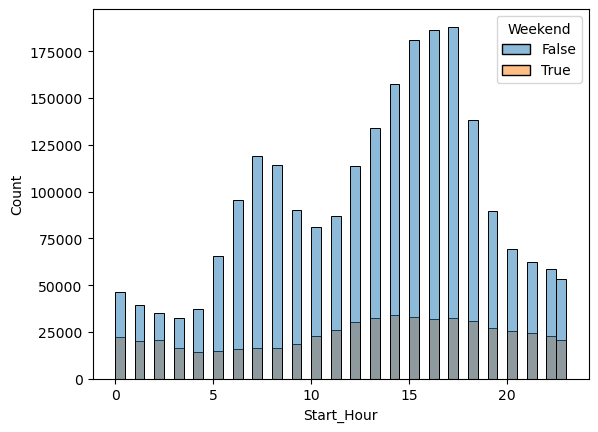

In [16]:
# plot start hour distribution using the weeked column for the hue
sns.histplot(data=df,
             x='Start_Hour', 
             hue='Weekend', 
             binwidth=0.5)

**The distribution of accidents by hour differs on weekends vs weekdays. More accidents occur on the weekdays.**

### 6. What is the distribution of start time on Sundays?

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

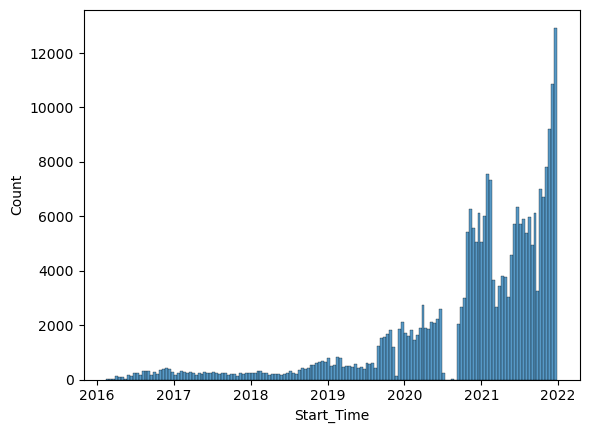

In [17]:
# filter dataframe for Sundays, plot histogram
sns.histplot(data=df.query("Day_of_Week == 6"), x='Start_Time')

### 7. Create a geographical plot to show accidents across a map of the United States.

In [18]:
# create zip of starting lattitude, longitude, and accident severity; view first 10 list items
my_zip = zip(df['Start_Lat'], df['Start_Lng'], df['Severity'])
list_of_my_zip = list(my_zip)
list_of_my_zip[0:10]

[(40.10891, -83.09286, 3),
 (39.86542, -84.0628, 2),
 (39.10266, -84.52468, 2),
 (41.06213, -81.53784, 2),
 (39.172393, -84.49279200000002, 3),
 (39.06324, -84.03243, 2),
 (39.77565, -84.18603, 2),
 (41.37531, -81.82016999999998, 2),
 (40.702247, -84.075887, 2),
 (40.10931, -82.96849, 2)]

In [19]:
# create folium heatmap
m = folium.Map(location=[40, -95], tiles='OpenStreetMap', zoom_start=4)

hm_layer = HeatMap(list_of_my_zip,
                   min_opacity=0.2,
                   radius=8,
                   blur=6)
m.add_child(hm_layer)

### 8.    Among the top 100 cities in number of accidents, which states do they belong to most frequently?

In [21]:
# create new dataframe from the first 100 observations of our cities dataframe
top_100 = cities.head(100)
top_100

,City,State,ID
0,Miami,FL,106896
1,Los Angeles,CA,68956
2,Orlando,FL,54654
3,Dallas,TX,41615
4,Houston,TX,39366
...,...,...,...
95,Orange,CA,3593
96,Columbus,OH,3550
97,Ogden,UT,3542
98,Bend,OR,3540


[Text(0.5, 1.0, 'Top 10 States for Automobile Accidents')]

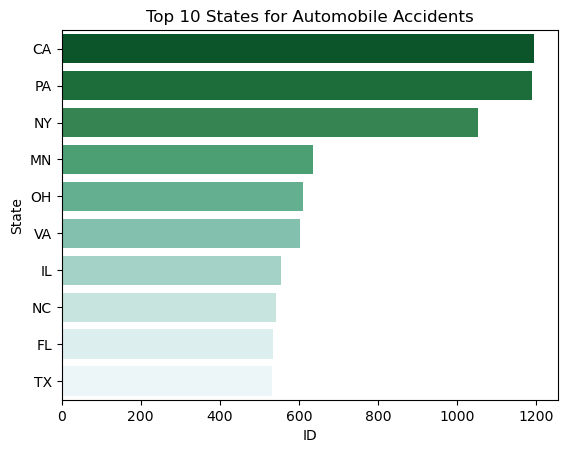

In [22]:
# group by cities dataframe state, count the number of accidents using the ID column, sort in decending order, and view the first 10 rows
top_states = cities.groupby('State')['ID']\
             .count()\
             .sort_values(ascending=False)\
             .reset_index()\
             .head(10)

sns.barplot(data=top_states, x='ID', y='State', orient='h', palette='BuGn_r', ).set(title='Top 10 States for Automobile Accidents')

### 9. Which months have the most accidents?

In [23]:
# add month column by extracting the month from the start time column
df['Month'] = df['Start_Time'].dt.month
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Street,Side,City,County,State,Zipcode,Day_of_Week,Start_Hour,Weekend,Month
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,Outerbelt E,R,Dublin,Franklin,OH,43017,0,0,False,2
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,I-70 E,R,Dayton,Montgomery,OH,45424,0,5,False,2
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,I-75 S,R,Cincinnati,Hamilton,OH,45203,0,6,False,2
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,I-77 N,R,Akron,Summit,OH,44311,0,6,False,2
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,I-75 S,R,Cincinnati,Hamilton,OH,45217,0,7,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,Pomona Fwy E,R,Riverside,Riverside,CA,92501,4,18,False,8
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,I-8 W,R,San Diego,San Diego,CA,92108,4,19,False,8
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,Garden Grove Fwy,R,Orange,Orange,CA,92866,4,19,False,8
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,4,19,False,8


[Text(0.5, 1.0, 'Accidents by Month')]

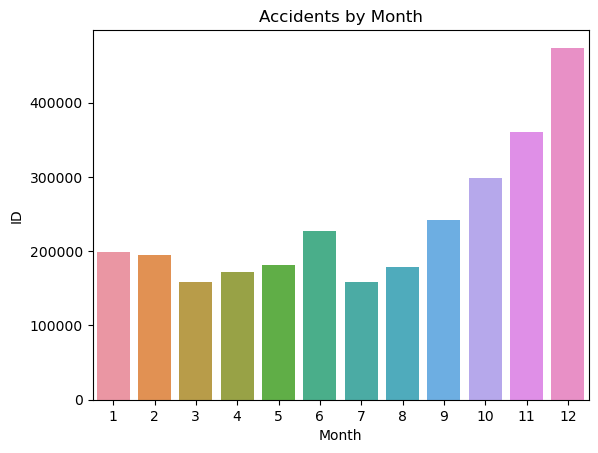

In [24]:
# group by month, count the number of accidents using the ID column
top_months = df.groupby('Month')['ID']\
             .count()\
             .sort_values(ascending=False)\
             .reset_index()\

sns.barplot(data=top_months, x='Month', y='ID', ).set(title='Accidents by Month')

**The fall and winter months have the most accidents, with December having the most accidents in the year. June also has a higher number of accidents.**

### 10.   What is the trend of accidents year over year (decreasing/increasing?)

In [25]:
# add year column to the dataframe using the start time column
df['Year'] = df['Start_Time'].dt.year
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Side,City,County,State,Zipcode,Day_of_Week,Start_Hour,Weekend,Month,Year
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,R,Dublin,Franklin,OH,43017,0,0,False,2,2016
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,R,Dayton,Montgomery,OH,45424,0,5,False,2,2016
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,R,Cincinnati,Hamilton,OH,45203,0,6,False,2,2016
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,R,Akron,Summit,OH,44311,0,6,False,2,2016
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,R,Cincinnati,Hamilton,OH,45217,0,7,False,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,R,Riverside,Riverside,CA,92501,4,18,False,8,2019
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,R,San Diego,San Diego,CA,92108,4,19,False,8,2019
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,R,Orange,Orange,CA,92866,4,19,False,8,2019
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,R,Culver City,Los Angeles,CA,90230,4,19,False,8,2019


In [26]:
# group by year, count the number of accidents using the ID column
years = df.groupby('Year')['ID']\
          .count()\
          .copy()\
          .reset_index()

years

,Year,ID
0,2016,122024
1,2017,163918
2,2018,163176
3,2019,258615
4,2020,625864
5,2021,1511745


<AxesSubplot:xlabel='Year', ylabel='ID'>

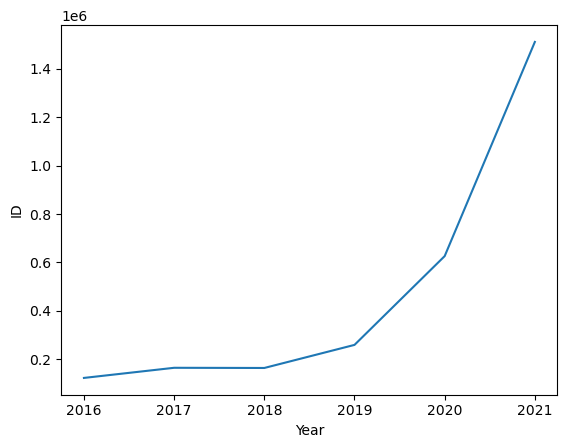

In [27]:
# view line plot of change of years
sns.lineplot(data=years, x='Year', y='ID')

**The line plot shows that the number of accidents have increased since 2016. There was a very slight decrease in aaccidents from 2017 to 2018, followed by sharp increases in the subsequent years.**

### 11. Is the state of New York in the data?

In [28]:
# checking the state values, we see NY listed
df['State'].sort_values().unique()

array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [29]:
# view the first five rows of the data filtered for NY
df.query("State == 'NY'").head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Side,City,County,State,Zipcode,Day_of_Week,Start_Hour,Weekend,Month,Year
31580,A-31581,2,2016-11-30 15:58:59,2016-11-30 21:58:59,40.850020,-73.943990,40.85329,-73.96064,0.899,Between Amsterdam Ave/Harlem River Dr and Huds...,...,R,New York,New York,NY,10033,2,15,False,11,2016
31607,A-31608,2,2016-11-30 17:13:53,2016-11-30 23:13:53,41.311771,-74.121299,41.12997,-74.16773,12.791,Between RT-17/Toll Plaza/Exit 16 and RT-17/RT-...,...,R,Central Valley,Orange,NY,10917,2,17,False,11,2016
31609,A-31610,2,2016-11-30 17:12:20,2016-11-30 23:12:20,43.039261,-76.142130,43.04273,-76.14244,0.240,At Adams St/Exit 18 - Accident.,...,R,Syracuse,Onondaga,NY,13210,2,17,False,11,2016
31625,A-31626,2,2016-11-30 17:31:55,2016-11-30 23:31:55,40.771460,-73.946580,40.76878,-73.94906,0.226,At 79th St - Accident.,...,R,New York,New York,NY,10028,2,17,False,11,2016
31626,A-31627,2,2016-11-30 17:31:55,2016-11-30 23:31:55,40.698450,-73.983030,40.69946,-73.98415,0.091,At Manhattan BR/Exit 29A - Accident.,...,R,Brooklyn,Kings,NY,11201,2,17,False,11,2016


**Yes, the state of NY is represented in the data.**

### 12. What are the top 10 states with the fewest number of accidents?

In [30]:
# group by state, count the number of accidents using the ID column, view first 10 rows
fewest = df.groupby('State')['ID']\
         .count()\
         .sort_values()\
         .copy()\
         .reset_index()

fewest.head(10)

,State,ID
0,SD,201
1,VT,365
2,WY,990
3,ME,2193
4,ND,2258
5,NM,2370
6,NE,3320
7,NH,3866
8,RI,4451
9,DE,4842
